<a href="https://colab.research.google.com/github/Yuki-yy/-/blob/master/%E3%82%A2%E3%83%8A%E3%83%AD%E3%82%B0%E5%9B%9E%E8%B7%AF%E3%81%AE%E8%A7%A3%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# はじめに
変数名にR1，R2を含むものは，抵抗にR1またはR2のどちらを使った場合であるかを表している。

In [9]:
import numpy as np
import matplotlib.pyplot as plt

f = np.array([1000, 2000, 3000, 4000, 4878, 7000, 9000, 10000, 20000, 30000])
V = 6
f0_R1 = 4878
f0_R2 = 4950
R1 = 3000
R2 = 6200
L = 100 * (10**-3)
C = 0.01 * (10**-6)
V_R1 = np.array([1.2, 2.54, 3.8, 4.92, 5.25, 4.56, 3.56, 3.16, 1.44, 0.88])
V_R2 = np.array([2.34, 3.96, 4.88, 5.4, 5.5, 5.3, 4.72, 4.6, 2.68, 1.82])
R1_range = 0.03*(10**3)
R2_range = 0.062*(10**3)
L_range = 5*(10**-3)
C_range = [0.008*(10**-6), -0.002*(10**-6)]

電源周波数 f[Hz]に対する負荷抵抗電圧振幅 V[V]の関係をプロットする。

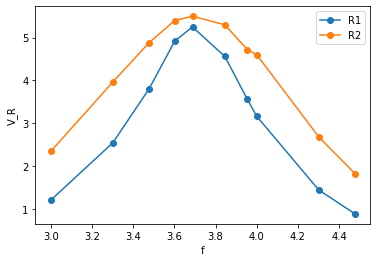

In [10]:
plt.xlabel('f')
plt.ylabel('V_R')
plt.plot(np.log10(f), V_R1, marker='o', label='R1')
plt.plot(np.log10(f), V_R2, marker='o', label='R2')
plt.legend()
plt.show()

# 課題１

回路電流の振幅 ｜I｜が，周波数 f に対してどのように変化するか

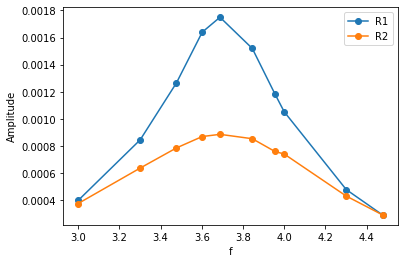

In [11]:
is_I = lambda V_R, R: V_R / R
I = is_I(V_R1, R1)
plt.plot(np.log10(f), I, marker='o', label='R1')

I = is_I(V_R2, R2)
plt.plot(np.log10(f), I, marker='o', label='R2')

plt.legend()
plt.xlabel('f')
plt.ylabel('Amplitude')
plt.show()

位相差 ∠𝐼 − ∠𝑉 が，周波数 f に対してどのように変化するか

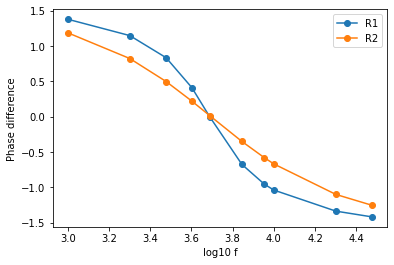

In [12]:
def is_x(f, f_0, R):
  global C
  w_0 = 2 * np.pi * f_0
  Q = 1 / w_0 / C / R
  x = Q * (f / f_0 - f_0 / f)
  return x

x = is_x(f, f0_R1, R1)
location_difference = np.arctan(-x)
plt.plot(np.log10(f), location_difference, marker='o', label='R1')

x = is_x(f, f0_R2, R2)
location_difference = np.arctan(-x)
plt.plot(np.log10(f), location_difference, marker='o', label='R2')
plt.legend()
plt.xlabel('log10 f')
plt.ylabel('Phase difference')
plt.show()

# 課題２
期待されうる f0と Qの範囲

In [14]:
def is_f0(L, C):
  f0 = 1 / 2 / np.pi / ((L * C)**(0.5))
  return f0

f0_low = is_f0(L+L_range, C+C_range[0])
f0_high = is_f0(L-L_range, C+C_range[1])
print(f0_low, 'f0', f0_high, sep=' < ')

def is_Q(R, L, C):
  Q = 1 / R * ((L / C)**(0.5))
  return Q

Q1_low = is_Q(R1+R1_range, L-L_range, C+C_range[0])
Q1_high = is_Q(R1-R1_range, L+L_range, C+C_range[1])
print(Q1_low, 'Q_R1', Q1_high, sep=' < ')

Q2_low = is_Q(R2+R2_range, L-L_range, C+C_range[0])
Q2_high = is_Q(R2-R2_range, L+L_range, C+C_range[1])
print(Q2_low, 'Q_R2', Q2_high, sep=' < ')

3660.9114942269766 < f0 < 5773.156565039027
0.7581985012150837 < Q_R1 < 1.2198128574233535
0.3668702425234276 < Q_R2 < 0.5902320277854936


# 課題３
Lと Cの値を推定
$$
X = 2\pi f_0 \\
Y = RQ
$$
とすると，
$$
L = \frac{Y}{X} \\
C = \frac{1}{XY}
$$
であることを利用する。

In [16]:
# X = 2π * f0
X_low = 2 * np.pi * f0_low
X_high = 2 * np.pi * f0_high

# Y = RQ
Y1_low = (R1-R1_range) * Q1_low
Y1_high = (R1+R1_range) * Q1_high
Y2_low = (R2-R2_range) * Q2_low
Y2_high = (R2+R2_range) * Q2_high

L1_low = Y1_low / X_high
L1_high = Y1_high / X_low
print(L1_low, 'L1', L1_high, sep=' < ')

L2_low = Y2_low / X_high
L2_high = Y2_high / X_low
print(L2_low, 'L2', L2_high, sep=' < ')

C1_low = 1 / X_high / Y1_high
C1_high = 1 / X_low / Y1_low
print(C1_low, 'C1', C1_high, sep=' < ')

C2_low = 1 / X_high / Y2_high
C2_high = 1 / X_low / Y2_low
print(C2_low, 'C2', C2_high, sep=' < ')

0.062079207920792086 < L1 < 0.1606818181818182
0.062079207920792086 < L2 < 0.16068181818181818
7.458834327914681e-09 < C1 < 1.9305965740662738e-08
7.458834327914681e-09 < C2 < 1.9305965740662738e-08
